In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data=pd.read_csv('C:/Deloitte Folder/ML/Decision Trees/Social_Network_Ads.csv')

In [43]:
x=data.iloc[:,2:4].values
y=data.iloc[:,-1].values

In [50]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [51]:
from sklearn.model_selection import train_test_split
# change in the split size affects the accuracy of the testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state = 0)

In [52]:
# performing feature scaling on only age and salary column. 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# p=2 is same as using euclidean distance metric for the distance calculation. By default metric is minkowski
knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
# making the predictions on age as 30 and salary as 80k
print(knn.predict(sc.transform([[30,80000]])))

[0]


### Measuring the Training and Testing score

In [55]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)


Text(0, 0.5, 'Accuracy')

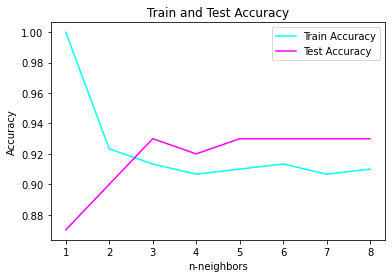

In [56]:
plt.plot(neighbors,train_accuracy,color='cyan',label='Train Accuracy')
plt.plot(neighbors,test_accuracy,color='magenta',label='Test Accuracy')
plt.legend()

plt.title('Train and Test Accuracy')
plt.xlabel('n-neighbors')
plt.ylabel('Accuracy')